In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def create_random_graph(nodes):
    """
    Erstellt einen zufälligen vollständigen Graphen mit einer gegebenen Anzahl von Knoten und zufälligen Gewichten auf den Kanten.
    """
    G = nx.complete_graph(nodes)
    for edge in G.edges():
        G.edges[edge]['weight'] = random.randint(1, 10)
    return G

def calculate_total_distance(graph, path):
    """
    Berechnet die Gesamtentfernung eines Pfades in einem gegebenen Graphen.
    """
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += graph[path[i]][path[i + 1]]['weight']
    total_distance += graph[path[-1]][path[0]]['weight']  # Add the distance from the last node to the first node
    return total_distance

def calculate_fitness(graph, path):
    """
    Berechnet die Fitness eines Pfades in einem gegebenen Graphen. 
    Die Fitness wird als Kehrwert der Gesamtentfernung plus eins berechnet, 
    um sicherzustellen, dass kürzere Pfade eine höhere Fitness haben.
    """
    return 1 / (1 + calculate_total_distance(graph, path))

def initialize_population(graph, population_size):
    """
    Initialisiert eine Population für einen genetischen Algorithmus.
    """
    population = []
    nodes = list(graph.nodes())
    for _ in range(population_size):
        path = nodes.copy()
        random.shuffle(path)
        population.append(path)
    return population

def crossover(parent1, parent2):
    """
    Führt eine Crossover-Operation an zwei Eltern durch, um ein Kind zu erzeugen.
    Die Operation verwendet den Order Crossover (OX1) Algorithmus.
    """
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + [node for node in parent2 if node not in parent1[:crossover_point]]
    return child

def mutate(path):
    """
    Führt eine Mutationsoperation an einem Pfad durch.
    Die Operation verwendet den Swap Mutation Algorithmus, bei dem zwei zufällige Punkte im Pfad ausgetauscht werden.
    """
    mutation_point1 = random.randint(0, len(path) - 1)
    mutation_point2 = random.randint(0, len(path) - 1)
    path[mutation_point1], path[mutation_point2] = path[mutation_point2], path[mutation_point1]
    return path

def genetic_algorithm(graph, population_size, generations):
    data = []
    population = initialize_population(graph, population_size)

    for generation in range(generations):
        population = sorted(population, key=lambda path: calculate_fitness(graph, path), reverse=True)

        # Tracking of best path in each generation
        best_path = population[0]
        best_distance = calculate_total_distance(graph, best_path)
        data.append({"Generation": generation + 1, "Best Path": best_path, "Best Distance": best_distance})

        new_population = [best_path]

        while len(new_population) < population_size:
            parent1 = random.choice(population[:population_size // 2]) # select the best half of the population as parents
            parent2 = random.choice(population[:population_size // 2]) # select the best half of the population as parents
            child = crossover(parent1, parent2)
            if random.random() < 0.1: # mutation rate
                child = mutate(child)
            new_population.append(child) # general replacement strategy

        population = new_population
        print(f"Generation {generation + 1} | Best Path: {best_path}| Best Distance: {best_distance}")

    # Plot the best distance for each generation
    data_df = pd.DataFrame(data)
    plt.subplot(1, 2, 1)
    plt.plot(data_df["Generation"], data_df["Best Distance"])
    plt.xlabel("Generation")
    plt.ylabel("Best Distance")
    plt.title("Best Distance per Generation")

    return best_path

def plot_graph(graph, path):
    """
    Zeichnet einen Graphen und einen Pfad darauf.
    """
    plt.subplot(1, 2, 2)
    plt.title("Graph")
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)], edge_color='r', width=2)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()


Generation 1 | Best Path: [6, 3, 4, 1, 0, 2, 5]| Best Distance: 25
Generation 2 | Best Path: [6, 3, 4, 1, 0, 2, 5]| Best Distance: 25
Generation 3 | Best Path: [6, 3, 2, 4, 1, 0, 5]| Best Distance: 24
Generation 4 | Best Path: [6, 3, 2, 4, 1, 0, 5]| Best Distance: 24
Generation 5 | Best Path: [6, 3, 2, 4, 1, 0, 5]| Best Distance: 24
Generation 6 | Best Path: [6, 3, 2, 4, 1, 0, 5]| Best Distance: 24
Generation 7 | Best Path: [6, 3, 2, 4, 1, 0, 5]| Best Distance: 24
Generation 8 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 9 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 10 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 11 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 12 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 13 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 14 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Distance: 18
Generation 15 | Best Path: [2, 3, 4, 1, 0, 6, 5]| Best Di

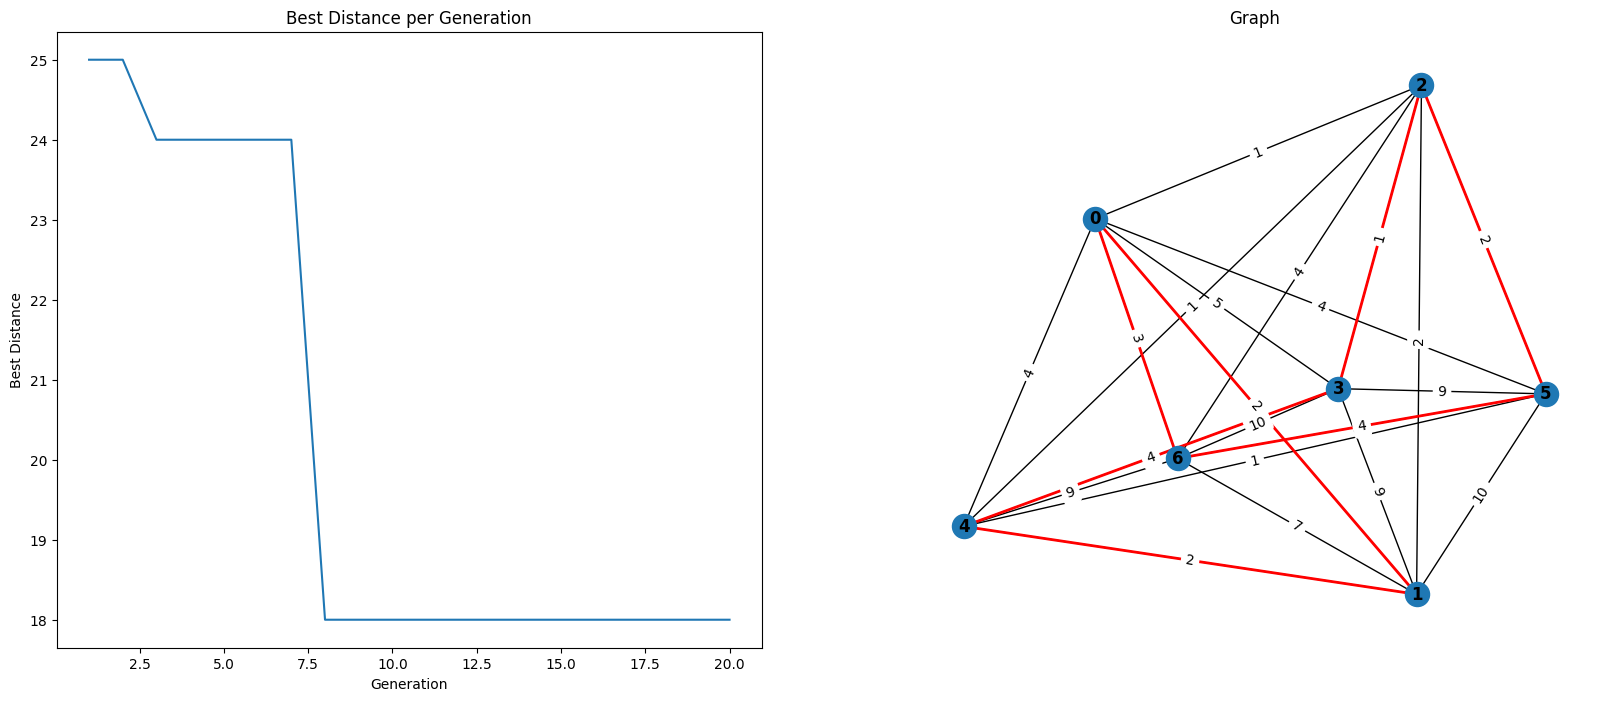

In [7]:
random.seed(42)
graph = create_random_graph(7)
population_size = 20
generations = 20

plt.figure(figsize=(20, 8))

best_path = genetic_algorithm(graph, population_size, generations)
best_path.append(best_path[0])  # Add the start node at the end to make the path closed
plot_graph(graph, best_path)

In [8]:
# Vergleich mit dem greedy_tsp Algorithmus

path = nx.approximation.greedy_tsp(graph, source=0)
print("Best Path:", path)
print("Best Distance:", calculate_total_distance(graph, path[:-1]))

Best Path: [0, 2, 3, 4, 5, 6, 1, 0]
Best Distance: 20
